In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env PYTHONPATH = /home/adityasidharta/git/kaggle_humpback_new_whale
%env PROJECT_PATH = /home/adityasidharta/git/kaggle_humpback_new_whale
%cd /home/adityasidharta/git/kaggle_humpback_new_whale

env: PYTHONPATH=/home/adityasidharta/git/kaggle_humpback_new_whale
env: PROJECT_PATH=/home/adityasidharta/git/kaggle_humpback_new_whale
/home/adityasidharta/git/kaggle_humpback_new_whale


In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import os
from sklearn.externals import joblib
from utils.envs import *
from utils.config import *
from utils.common import get_label, remove_new_whale
from model.dataset import train_transform, test_transform, TestDataset, TrainDataset

In [4]:
train_df = pd.read_csv(train_repo)
train_df = remove_new_whale(train_df)
ohe_model, train_label, ohe_label = get_label(train_df)
joblib.dump(ohe_model, os.path.join(artifacts_path, 'ohe_model.pkl'))

['/home/adityasidharta/git/kaggle_humpback_new_whale/output/artifacts/ohe_model.pkl']

In [5]:
test_label = [x for x in os.listdir(test_path) if x.endswith('.jpg')]

In [6]:
train_dataset = TrainDataset(train_label, ohe_label, train_path, train_transform, DEVICE)
test_dataset = TestDataset(test_label, test_path, test_transform, DEVICE)

In [7]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True, num_workers = 0)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False, num_workers = 0)

In [8]:
img, label = next(iter(train_loader))

In [18]:
data = img[0, :, :, :].data.cpu().numpy()

In [55]:
fake = torch.rand((1, 16, 120, 120))

In [60]:
class SEModule(nn.Module):

    def __init__(self, channels, reduction):
        super(SEModule, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Conv2d(channels, channels // reduction, kernel_size=1,
                             padding=0)
        self.relu = nn.ReLU(inplace=True)
        self.fc2 = nn.Conv2d(channels // reduction, channels, kernel_size=1,
                             padding=0)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        module_input = x
        print(x.shape)
        x = self.avg_pool(x)
        print(x.shape)
        x = self.fc1(x)
        print(x.shape)
        x = self.relu(x)
        print(x.shape)
        x = self.fc2(x)
        print(x.shape)
        x = self.sigmoid(x)
        print(x.shape)
        return x


In [61]:
model = SEModule(16, 2)

In [63]:
model(fake)

torch.Size([1, 16, 120, 120])
torch.Size([1, 16, 1, 1])
torch.Size([1, 8, 1, 1])
torch.Size([1, 8, 1, 1])
torch.Size([1, 16, 1, 1])
torch.Size([1, 16, 1, 1])


tensor([[[[0.5292]],

         [[0.4885]],

         [[0.4747]],

         [[0.5130]],

         [[0.4301]],

         [[0.4864]],

         [[0.4511]],

         [[0.5570]],

         [[0.4166]],

         [[0.5966]],

         [[0.4400]],

         [[0.6144]],

         [[0.4449]],

         [[0.5164]],

         [[0.5703]],

         [[0.5978]]]], grad_fn=<SigmoidBackward>)

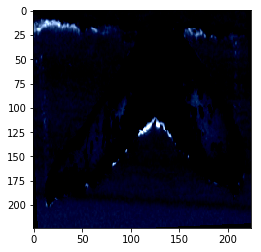

In [25]:
plt.imshow(np.moveaxis(data, 0, -1))